In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import median
from datetime import date

In [2]:
# Hier euren Pfad zur CSV einfügen
path = "C:/Users/lorga/Desktop/Parlament/data/"
meps_former_df = pd.read_csv(path + "output_former.csv", sep = ";")
meps_current_df = pd.read_csv(path + "output.csv", sep = ";")

Altes Parlament

In [3]:
meps_former_df.head()

,identifier,name,familyName,givenName,country,group,gender,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,highest_degree,occupation
0,197483,sylvia limmer,Limmer,Sylvia,DE,NI,FEMALE,NaN,Bayreuth,8,2,1966,NaN,NaN,NaN,NaN,"politician,doctor"
1,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,"LIBE,D-ME,AGRI,FEMM,D-JP",Dortmund,30,4,1986,NaN,NaN,NaN,university,"politician,media,manager"
2,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,"AFCO,AGRI,D-RS,D-IN,ITRE,IMCO,D-RU",Fondi,27,10,1971,NaN,NaN,Sapienza University of Rome,university,"politician,lawyer,businessperson,manager"
3,124739,carlos zorrinho,Zorrinho,Carlos,PT,S&D,MALE,"DACP,ITRE,DAFR,DEVE,DMAS",Óbidos,28,5,1959,NaN,NaN,University of Évora,phd,"official,politician,researcher"
4,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,"ITRE,JURI,D-US,DLAT,ENVI",LILLE,27,5,1987,NaN,NaN,Sciences Po,NaN,"politician,lawyer,activist"


Neues Parlament

In [4]:
meps_current_df.head()

,identifier,name,familyName,givenName,country,group,gender,memberships,born_place,born_day,born_month,born_year,disability,relatives,educated_at,highest_degree,occupation
0,257258,ivaylo valchev,Valchev,Ivaylo,BG,ECR,MALE,"CULT,PETI,AFET,IMCO",Burgas,9.0,1.0,1972.0,NaN,NaN,NaN,NaN,NaN
1,257073,tobiasz bocheński,Bocheński,Tobiasz,PL,ECR,MALE,"JURI,AFCO",Lodz,15.0,12.0,1987.0,NaN,NaN,NaN,NaN,NaN
2,99945,lena düpont,Düpont,Lena,DE,PPE,FEMALE,"LIBE,AGRI",Dortmund,30.0,4.0,1986.0,NaN,NaN,NaN,university,"manager,media,politician"
3,204333,salvatore de meo,De Meo,Salvatore,IT,PPE,MALE,"AGRI,AFCO,IMCO,SEDE",Fondi,27.0,10.0,1971.0,NaN,NaN,Sapienza University of Rome,university,"businessperson,lawyer,manager,politician"
4,97236,marie toussaint,Toussaint,Marie,FR,Verts/ALE,FEMALE,"ECON,ENVI,ITRE,FISC,SANT",LILLE,27.0,5.0,1987.0,NaN,NaN,Sciences Po,NaN,"lawyer,activist,politician"


In [5]:
group_list = ["The Left", "S&D", "Verts/ALE", "Renew", "PPE", "ECR", "PfE", "ESN"]

In [6]:
country_list = list(set(meps_current_df["country"].tolist()))
org_list = []
for list_entry in meps_current_df["memberships"].tolist():
    if list_entry:
        for entry in str(list_entry).split(","):
            org_list.append(entry)
org_list = list(set(org_list))
org_list.remove("nan")
committee_list = [org for org in org_list if org[0] != "D"]

### Wiedergewählte Abgeordnete

Wieviele der aktuellen Abgeordneten saßen schon im letzten Parlament?

In [7]:
former_identifiers = meps_former_df["identifier"].tolist()
current_identifiers = meps_current_df["identifier"].tolist()
counter = len(current_identifiers)
return_counter = 0
for identifier in current_identifiers:
    if identifier in former_identifiers:
        return_counter += 1
print(round(return_counter / counter * 100, 2), "%")

45.76 %


Wieviele der Abgeordneten einzelner Fraktionen saßen schon im letzten Parlament?

In [8]:
def filter_returned(column, column_entries, current_df, former_df):
    return_dict = {}
    for column_entry in column_entries:
        return_counter = 0
        filter_current_df = current_df.loc[current_df[column].notna()]
        filter_current_df = filter_current_df.loc[filter_current_df[column].str.contains(column_entry)]
        filter_former_df = former_df.loc[former_df[column].notna()]
        filter_former_df = filter_former_df.loc[filter_former_df[column].str.contains(column_entry)]
        current_identifiers = filter_current_df["identifier"].tolist()
        former_identifiers = former_df["identifier"].tolist()
        former_filter_identifiers = filter_former_df["identifier"].tolist()
        for identifier in current_identifiers:
            if identifier in former_identifiers:
                return_counter += 1
        # Variante 1: Wie viele der aktuellen MEPs einer Fraktion sind Rückkehrer?
        returned_current_ratio = return_counter / len(current_identifiers) * 100
        # Variante 2: Wie viele der ehemaligen MEPs einer Fraktion sind zurückgekehrt?
        try:
            returned_former_ratio = return_counter / len(former_filter_identifiers) * 100
        except:
            returned_former_ratio = "nan"
        return_dict[column_entry] = [return_counter, len(current_identifiers), 
                                     returned_current_ratio, returned_former_ratio]
    return_df = pd.DataFrame.from_dict(return_dict, orient = "index")#.transpose()
    return_df = return_df.reset_index()
    return_df = return_df.rename(columns = {"index": column, 0: "returned_meps", 1: "current_meps", 
                                            2: "current_return_ratio", 3: "former_return_ratio"})
    return return_df.sort_values("current_return_ratio")

In [9]:
group_returned_df = filter_returned("group", group_list, meps_current_df, meps_former_df)
group_returned_df = group_returned_df.sort_index()
group_returned_df.to_csv("followup_group_returned.csv", index = False)
group_returned_df

,group,returned_meps,current_meps,current_return_ratio,former_return_ratio
0,The Left,14,46,30.434783,37.837838
1,S&D,71,136,52.205882,51.079137
2,Verts/ALE,31,53,58.490566,43.661972
3,Renew,39,77,50.649351,38.235294
4,PPE,101,188,53.723404,57.386364
5,ECR,28,78,35.897436,40.57971
6,PfE,34,84,40.476190,nan
7,ESN,4,25,16.000000,nan


Wieviele der Abgeordneten aus einzelnen Ländern saßen schon im letzten Parlament?

In [10]:
country_returned_df = filter_returned("country", country_list, meps_current_df, meps_former_df)
country_returned_df.to_csv("followup_country_returned.csv", index = False)
country_returned_df

,country,returned_meps,current_meps,current_return_ratio,former_return_ratio
20,PT,1,21,4.761905,4.761905
2,FI,4,15,26.666667,28.571429
22,IT,25,76,32.894737,32.894737
23,PL,18,53,33.962264,34.615385
0,IE,5,14,35.714286,38.461538
24,HU,8,21,38.095238,38.095238
21,NL,12,31,38.709677,41.379310
8,SK,6,15,40.000000,42.857143
3,GR,9,21,42.857143,42.857143
17,FR,36,81,44.444444,45.569620


Wieviele der Abgeordneten in einzelnen Ausschüssen saßen schon im letzten Parlament?

In [11]:
committee_returned_df = filter_returned("memberships", committee_list, meps_current_df, meps_former_df)
committee_returned_df.to_csv("followup_committee_returned.csv", index = False)
committee_returned_df = committee_returned_df.rename(columns = {"memberships": "committee"})
committee_returned_df

,committee,returned_meps,current_meps,current_return_ratio,former_return_ratio
8,REGI,28,82,34.146341,33.734940
1,EMPL,37,103,35.922330,36.633663
13,PECH,20,53,37.735849,40.000000
0,CULT,23,60,38.333333,40.350877
6,PETI,24,62,38.709677,36.923077
17,TRAN,36,90,40.000000,37.113402
16,FEMM,29,72,40.277778,45.312500
5,SEDE,26,59,44.067797,49.056604
18,BUDG,31,70,44.285714,40.789474
10,IMCO,47,104,45.192308,57.317073


### Geschlecht

Wieviele Frauen und nichtbinäre Personen sitzen im neuen Parlament?

In [12]:
current_gender_df = pd.DataFrame(meps_current_df.value_counts("gender"))
current_gender_df = current_gender_df.reset_index().rename(columns = {0: "current_count"})
current_gender_df["current_pc"] = current_gender_df["current_count"] / current_gender_df["current_count"].sum()
former_gender_df = pd.DataFrame(meps_former_df.value_counts("gender"))
former_gender_df = former_gender_df.reset_index().rename(columns = {0: "former_count"})
former_gender_df["former_pc"] = former_gender_df["former_count"] / former_gender_df["former_count"].sum()
gender_df = pd.merge(current_gender_df, former_gender_df, on = "gender", how = "outer")
gender_df["change_count"] = gender_df["former_count"] - gender_df["current_count"]
gender_df["change_pc"] = gender_df["current_pc"] - gender_df["former_pc"]
gender_df.to_csv("followup_gender.csv", index = False)
gender_df

,gender,current_count,current_pc,former_count,former_pc,change_count,change_pc
0,MALE,441,0.613352,425.0,0.602837,-16.0,0.010515
1,FEMALE,277,0.385257,280.0,0.397163,3.0,-0.011906
2,NKN,1,0.001391,NaN,NaN,NaN,NaN


Wie haben sich diese Zahlen durch die Zeit entwickelt? 

Quelle für vorherige Daten: https://github.com/dw-data/mep-sociodemographics/tree/master/data

In [13]:
gender_time_df = pd.read_csv(path + ".." + "/analysis/" + "gender_time.csv")
gender_time_df["Share_nonbinary"] = 0
current_men_pc = round(gender_df.loc[gender_df["gender"] == "MALE"]["current_pc"].tolist()[0] * 100, 1)
current_women_pc = round(gender_df.loc[gender_df["gender"] == "FEMALE"]["current_pc"].tolist()[0] * 100, 1)
current_nb_pc = round(gender_df.loc[gender_df["gender"] == "NKN"]["current_pc"].tolist()[0] * 100, 1)
new_df = pd.DataFrame(pd.Series([2024, current_men_pc, current_women_pc, current_nb_pc])).transpose()
new_df = new_df.rename(columns = {0: "Opening_Session", 1: "Share_men", 2: "Share_women", 3: "Share_nonbinary"})
gender_time_df = gender_time_df.append(new_df, ignore_index = True)
gender_time_df.to_csv("followup_gender_time.csv", index = False)
gender_time_df

C:\Users\lorga\AppData\Local\Temp\ipykernel_56340\3684569122.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gender_time_df = gender_time_df.append(new_df, ignore_index = True)


,Opening_Session,Share_men,Share_women,Share_nonbinary
0,1979.0,84.0,16.0,0.0
1,1984.0,82.0,18.0,0.0
2,1989.0,81.0,19.0,0.0
3,1994.0,74.0,26.0,0.0
4,1999.0,70.0,30.0,0.0
5,2004.0,69.0,31.0,0.0
6,2009.0,65.0,35.0,0.0
7,2014.0,63.0,37.0,0.0
8,2019.0,60.0,40.0,0.0
9,2024.0,61.3,38.5,0.1


In [14]:
def filter_men_perc(column, column_entries, df):
    gender_dict = {}
    non_na_df = df.loc[df[column].notna()]
    for column_entry in column_entries:
        filter_df = non_na_df.loc[non_na_df[column].str.contains(column_entry)]
        men_count = len(filter_df.loc[filter_df["gender"] == "MALE"].index)
        if len(filter_df.index > 0):
            men_percentage = men_count / len(filter_df.index) * 100
            gender_dict[column_entry] = men_percentage
    filter_percentage_df = pd.DataFrame.from_dict([gender_dict]).transpose()
    filter_percentage_df = filter_percentage_df.reset_index()
    filter_percentage_df = filter_percentage_df.rename(columns = {"index": column, 0: "men_percentage"})
    return filter_percentage_df.sort_values("men_percentage")

In [15]:
def compare_current_former(function, column, column_entries, meps_current_df, meps_former_df):
    current_df = function(column, column_entries, meps_current_df)
    former_df = function(column, column_entries, meps_former_df)
    compare_df = pd.merge(current_df, former_df, 
                            on = column, how = "outer", suffixes = ("_current", "_former"))
    compare_df["change"] = compare_df.iloc[:, -2] - compare_df.iloc[:, -1] 
    return compare_df

Wie viele Männer sitzen in einzelnen Fraktionen?

In [16]:
group_men_df = compare_current_former(filter_men_perc, "group", group_list, meps_current_df, meps_former_df)
group_men_df.to_csv("followup_group_men.csv", index = False)
group_men_df

,group,men_percentage_current,men_percentage_former,change
0,Verts/ALE,49.056604,52.112676,-3.056072
1,The Left,54.347826,48.648649,5.699177
2,Renew,55.844156,57.843137,-1.998981
3,S&D,57.352941,57.553957,-0.201016
4,PfE,59.523810,NaN,NaN
5,PPE,63.297872,62.500000,0.797872
6,ESN,68.000000,NaN,NaN
7,ECR,78.205128,72.463768,5.741360


Wie viele Männer wählen einzelne Länder? 

In [17]:
country_men_df = compare_current_former(filter_men_perc, "country", country_list, meps_current_df, meps_former_df)
country_men_df.to_csv("followup_country_men.csv", index = False)
country_men_df

,country,men_percentage_current,men_percentage_former,change
0,SE,38.095238,47.619048,-9.523810
1,FI,40.000000,35.714286,4.285714
2,FR,49.382716,51.898734,-2.516018
3,ES,50.000000,49.152542,0.847458
4,NL,51.612903,55.172414,-3.559511
5,HU,52.380952,61.904762,-9.523810
6,SK,53.333333,71.428571,-18.095238
7,IE,57.142857,61.538462,-4.395604
8,HR,58.333333,66.666667,-8.333333
9,BE,59.090909,61.904762,-2.813853


Wie viele Männer sitzen in einzelnen Ausschüssen?

In [18]:
committee_men_df = compare_current_former(filter_men_perc, "memberships", committee_list, meps_current_df, meps_former_df)
committee_men_df = committee_men_df.rename(columns = {"memberships": "committee"})
committee_men_df.to_csv("followup_committee_men.csv", index = False)
committee_men_df

,committee,men_percentage_current,men_percentage_former,change
0,FEMM,11.111111,14.062500,-2.951389
1,EMPL,40.776699,43.564356,-2.787657
2,CULT,48.333333,57.894737,-9.561404
3,SANT,53.571429,48.148148,5.423280
4,IMCO,54.807692,56.097561,-1.289869
5,ENVI,55.617978,52.976190,2.641787
6,LIBE,55.782313,56.818182,-1.035869
7,REGI,57.317073,57.831325,-0.514252
8,PETI,58.064516,63.076923,-5.012407
9,AGRI,59.375000,60.674157,-1.299157


### Alter

In [19]:
def calculate_age(born_year, born_month, born_day):
    today = date(2024, 7, 16) # Doublecheck
    if born_month < today.month:
        return today.year - born_year
    elif born_month == today.month:
        if born_day <= today.day:
            return today.year - born_year
        return today.year - born_year - 1
    return today.year - born_year - 1   

Hat sich das Medianalter des EU-Parlaments mit der Wahl geändert?

In [20]:
former_ages_df = meps_former_df.loc[meps_former_df["born_year"].notna()]
former_ages_df = former_ages_df.loc[former_ages_df["born_year"] != 0]
former_ages_df = former_ages_df.loc[former_ages_df["born_year"].notna()]
former_ages = former_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
former_ages = sorted(former_ages)
former_median = median(former_ages)
current_ages_df = meps_current_df.loc[meps_current_df["born_year"].notna()]
current_ages_df = current_ages_df.loc[current_ages_df["born_year"] != 0]
current_ages_df = current_ages_df.loc[current_ages_df["born_year"].notna()]
current_ages = current_ages_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
current_ages = sorted(current_ages)
current_median = median(current_ages)
ages_df = pd.DataFrame([current_median, former_median, (current_median - former_median), (current_median - former_median + 5)]).transpose()
ages_df = ages_df.rename(columns = {0: "current_median_age", 1: "former_median_age", 2: "change", 3: "net_change"})
ages_df

,current_median_age,former_median_age,change,net_change
0,50.0,54.0,-4.0,1.0


In [21]:
def get_median_age(column, filter_list, meps_df):
    df = meps_df.loc[meps_df[column].notna()]
    df = df.loc[meps_df["born_year"] != 0]
    df = df.loc[meps_df["born_year"].notna()]
    median_age_dict = {}
    for filter_entry in filter_list:
        filter_df = df.loc[df[column].str.contains(filter_entry)]
        ages = filter_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
        ages = sorted(ages)
        median_age_dict[filter_entry] = median(ages)
    median_age_df = pd.DataFrame.from_dict(median_age_dict, orient = "index")
    median_age_df = median_age_df.reset_index().rename(columns = {"index": column, 0: "median_age"})
    median_age_df = median_age_df.sort_values("median_age")
    return median_age_df

Hat sich das Medianalter der Abgeordneten in einzelnen Fraktionen geändert?

In [22]:
group_age_df = compare_current_former(get_median_age, "group", group_list, meps_current_df, meps_former_df)
group_age_df["change_net"] = group_age_df["change"] + 5
group_age_df.to_csv("followup_group_age.csv", index = False)
group_age_df

C:\Users\lorga\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\lorga\anaconda3\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


,group,median_age_current,median_age_former,change,change_net
0,Verts/ALE,42.0,48.0,-6.0,-1.0
1,ESN,45.0,NaN,NaN,NaN
2,The Left,48.0,51.0,-3.0,2.0
3,ECR,49.0,58.0,-9.0,-4.0
4,Renew,50.0,52.0,-2.0,3.0
5,PfE,50.0,NaN,NaN,NaN
6,S&D,51.0,55.0,-4.0,1.0
7,PPE,52.0,55.0,-3.0,2.0


Wie sind Alter innerhalb der einzelnen Fraktion verteilt?

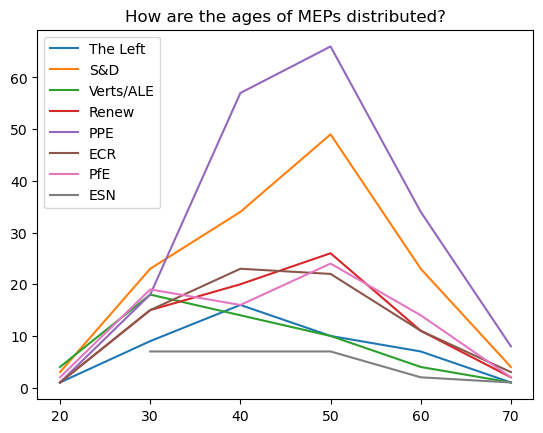

In [65]:
df_dict = {}
for group in group_list:
    group_df = meps_current_df.copy()
    group_df = group_df.loc[group_df["group"] == group]
    group_df["age"] = group_df.apply(lambda x: calculate_age(x["born_year"], x["born_month"], x["born_day"]), axis = 1)
    group_df = group_df.groupby("age").size()
    group_df = pd.DataFrame(group_df).reset_index().rename(columns = {0: "count"})
    group_df["decade"] = (group_df["age"] // 10) * 10
    group_df = group_df.groupby("decade").sum().reset_index()
    group_df = group_df.drop(columns=["age"])
    df_dict[group] = group_df
# Construct overall Dataframe
overall_df = pd.DataFrame({"decade": ["20", "30", "40", "50", "60", "70"]})
overall_df["decade"] = overall_df["decade"].astype(int)
for group in df_dict.keys():
    overall_df = overall_df.merge(df_dict[group], on = "decade", how = "left")
    overall_df = overall_df.rename(columns = {"count": group})
overall_df = overall_df.set_index("decade")
overall_df.to_csv("followup_group_age_buckets.csv")
# Plot
#for group in df_dict.keys():
#    plt.plot(df_dict[group]["decade"], df_dict[group]["count"], label = group)
#plt.legend()
#plt.title("How are the ages of MEPs distributed?")
#plt.show()

Hat sich das Medianalter von Abgeordneten aus einzelnen Ländern geändert?

In [21]:
country_age_df = compare_current_former(get_median_age, "country", country_list, meps_current_df, meps_former_df)
country_age_df["change_net"] = country_age_df["change"] + 5
country_age_df.to_csv("followup_country_age.csv", index = False)
country_age_df

,country,median_age_current,median_age_former,change,change_net
0,MT,40.5,43.5,-3.0,2.0
1,NL,41.5,50.0,-8.5,-3.5
2,CZ,44.0,48.0,-4.0,1.0
3,BG,44.0,53.0,-9.0,-4.0
4,SK,44.5,51.0,-6.5,-1.5
5,SI,46.0,57.0,-11.0,-6.0
6,SE,46.0,50.0,-4.0,1.0
7,FI,47.0,64.5,-17.5,-12.5
8,HU,48.5,49.0,-0.5,4.5
9,DE,49.0,53.5,-4.5,0.5


Hat sich das Medianalter von Abgeordneten in Ausschüssen geändert?

In [24]:
committee_age_df = compare_current_former(get_median_age, "memberships", committee_list, meps_current_df, meps_former_df)
committee_age_df = committee_age_df.rename(columns = {"memberships": "committee"})
committee_age_df["change_net"] = committee_age_df["change"] + 5
committee_age_df.to_csv("followup_committee_age.csv", index = False)
committee_age_df

,committee,median_age_current,median_age_former,change,change_net
0,FISC,45.0,54.5,-9.5,-4.5
1,ECON,47.0,54.0,-7.0,-2.0
2,BUDG,47.5,54.5,-7.0,-2.0
3,IMCO,48.0,50.5,-2.5,2.5
4,ITRE,48.0,53.0,-5.0,0.0
5,INTA,48.5,57.0,-8.5,-3.5
6,TRAN,49.0,53.0,-4.0,1.0
7,LIBE,49.0,49.0,0.0,5.0
8,ENVI,49.5,53.0,-3.5,1.5
9,PETI,49.5,51.0,-1.5,3.5
